In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
#Load and import the data

In [4]:
df = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Dataset/train.csv")
df_v = pd.read_csv("C:/Users/Weng/Desktop/Web economics/Dataset/validation.csv")

In [5]:
df_v.shape

(299749, 26)

In [6]:
df.bidprice.value_counts()

300    1038847
294     353123
238     350714
227     281102
241     225629
277     200177
254     130893
249     117253
Name: bidprice, dtype: int64

In [7]:
sample = df.sample(n=10000)
sample.click.value_counts()

0    9988
1      12
Name: click, dtype: int64

In [8]:
sample.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
474941,0,4,17,002f729aaebc4c518eb4d71cc0b8b84d,1,u_VhCxLx9TDQuvXsE,windows_chrome,119.54.187.*,55,58,...,90,0,0,70,86c2543527c86a893d4d4f68810a0416,300,70,43f4a37f42a7c5e6219e2601b26c6976,3386,"10076,10006,10083,10052,13403,10063,14273,1304..."
483413,0,6,14,80470c95c1e87adf18491d9425587868,1,u_Vhk7P5uCOIm63VL,windows_chrome,211.138.76.*,359,360,...,90,0,0,20,0cd33fcb336655841d3e1441b915748d,254,84,c8758e8658b05bc3a88af7b37bdf0575,3476,10075
2279125,0,4,15,d635c7afd78dae522602dc16316bd348,1,u_Vh5_PkFwL6NLJMa,windows_ie,120.43.136.*,124,129,...,250,1,0,5,44966cc8da1ed40c95d59e863c8c75f0,300,135,361e128affece850342293213691a043,3386,10024
2247826,0,5,15,f120fd83255b58f85d55865eecc7b923,1,u_Vhd_1DTG3Uf9BZj,windows_ie,125.93.171.*,216,233,...,90,2,1,0,cc9b344e950b4f8c2b96537174a343b7,227,152,d29e59bf0f7f8243858b8183f14d4412,3358,"10006,10063,10110"
2342767,0,3,20,d907892ea3b81b39ea62c20eca6a9b26,1,u_Vh1pVRprPlMcJG8,windows_ie,221.205.126.*,15,16,...,250,0,1,0,44966cc8da1ed40c95d59e863c8c75f0,300,101,361e128affece850342293213691a043,3386,"10024,10006,10031,13042,10075,13800,10110"


In [9]:
#Constant bidding strategy - Just using the mean value as the bidding

In [10]:
#Constant bid price at 274 - the mean value 
def constant_bid(dataframe, bid_price, flag=0):  #Change this value for the constant
    if flag == 1:
        for i in range(len(dataframe)):
            bid_id = dataframe.iloc[i].bidid; 
            print('Bid_id: '+ bid_id + ' ,' ,'Bid_price: '+ str(bid_price))  #controlled
            
    clicks = dataframe[dataframe.payprice <= bid_price].click.value_counts().sort_index().tolist() #Changed to payprice
    total_cost = sum(dataframe[dataframe.payprice <= bid_price].payprice)
    wins= sum(dataframe[dataframe.payprice <= bid_price].click.value_counts())
    win_ratio = round((wins/dataframe.shape[0])*100,2)
    #print ('Summary | '+ 'Constant Bid price: '+ str(bid_price))
    #print ('-----------------------------------')
    #print ('Number of impressions: '+ str(dataframe.shape[0]))
    #print ('Win counts: '+ str(wins))
    #print ('Win percentage: '+ str(win_ratio)+'%')
    if len(clicks) < 2:
        CTR = 0.00 
        clicks = '0'
        #print ('Clicks: '+ clicks)
    else:
        CTR = round((clicks[1]/clicks[0])*100,5)
        #print ('Clicks: '+ str(clicks[1]))
    #print ('CTR: '+ str(CTR)+ '%')
    #print ('Total cost: '+ str(total_cost)+ ' RMB')
    return [bid_price, wins, CTR , total_cost, clicks, win_ratio]

#### Constant bid - version 2 

In [11]:
#This is the test dataframe
sample.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
474941,0,4,17,002f729aaebc4c518eb4d71cc0b8b84d,1,u_VhCxLx9TDQuvXsE,windows_chrome,119.54.187.*,55,58,...,90,0,0,70,86c2543527c86a893d4d4f68810a0416,300,70,43f4a37f42a7c5e6219e2601b26c6976,3386,"10076,10006,10083,10052,13403,10063,14273,1304..."
483413,0,6,14,80470c95c1e87adf18491d9425587868,1,u_Vhk7P5uCOIm63VL,windows_chrome,211.138.76.*,359,360,...,90,0,0,20,0cd33fcb336655841d3e1441b915748d,254,84,c8758e8658b05bc3a88af7b37bdf0575,3476,10075
2279125,0,4,15,d635c7afd78dae522602dc16316bd348,1,u_Vh5_PkFwL6NLJMa,windows_ie,120.43.136.*,124,129,...,250,1,0,5,44966cc8da1ed40c95d59e863c8c75f0,300,135,361e128affece850342293213691a043,3386,10024
2247826,0,5,15,f120fd83255b58f85d55865eecc7b923,1,u_Vhd_1DTG3Uf9BZj,windows_ie,125.93.171.*,216,233,...,90,2,1,0,cc9b344e950b4f8c2b96537174a343b7,227,152,d29e59bf0f7f8243858b8183f14d4412,3358,"10006,10063,10110"
2342767,0,3,20,d907892ea3b81b39ea62c20eca6a9b26,1,u_Vh1pVRprPlMcJG8,windows_ie,221.205.126.*,15,16,...,250,0,1,0,44966cc8da1ed40c95d59e863c8c75f0,300,101,361e128affece850342293213691a043,3386,"10024,10006,10031,13042,10075,13800,10110"


In [12]:
def constant_bid_v2(dataframe, bid_price, flag=0):  #Change this value for the constant
    '''Returns all the main metrics of the bid : 
       Clicks / impressions won / win ratio/ CTR / CPM / eCPC 
       >> USE ALL THIS TO PLOT THE GRAPH FIGURES'''
    if flag == 1:
        for i in range(len(dataframe)):
            bid_id = dataframe.iloc[i].bidid; 
            print('Bid_id: '+ bid_id + ' ,' ,'Bid_price: '+ str(bid_price))  #controlled using flag system
            
    #Number of clicks        
    clicks = np.count_nonzero(dataframe[dataframe.payprice <= bid_price].click)
    #Number of impressions won 
    impressions = dataframe[dataframe.payprice <= bid_price].shape[0]
    #Win ratio
    win_ratio = round((impressions / dataframe.shape[0])*100,2)   
    #Total cost in FEN
    total_cost = dataframe[dataframe.payprice <= bid_price].payprice.sum()/1000
    #CTR
    CTR = round((clicks/impressions)*100,3)
    #CPM total cost [FEN] / all impressions then multiply by 1000
    CPM = round((total_cost/impressions)*1000,2)
    #CPC total cost [FEN] / Number of clicks
    if clicks == 0:
        eCPC = 0.00
    else:
        eCPC = round((total_cost/clicks),2)
    return [bid_price, clicks, impressions, win_ratio, total_cost, CTR, CPM, eCPC ]

In [13]:
constant_bid_v2(df_v, 95)

[95, 123, 220339, 73.51, 10793.086, 0.056, 48.98, 87.75]

In [136]:
def constant_bid_v3(dataframe, bid_price, budget, flag=0): 
    'Includes budget contraints and limits'
    
    new_df = dataframe[dataframe.payprice < bid_price]  #Checks whether you have won the bid - as new df
    new_df = new_df[(new_df.payprice/1000).cumsum()< budget]
    
    #Number of clicks        
    clicks = np.count_nonzero(new_df.click)
    #Number of impressions won 
    impressions = new_df.shape[0]
    #Win ratio
    win_ratio = round((impressions / dataframe.shape[0])*100,2) 
    #Total cost in FEN
    total_cost = new_df.payprice.sum()/1000
    #CTR
    CTR = round((clicks/impressions)*100,3)
    #CPM total cost [FEN] / all impressions then multiply by 1000
    CPM = round((total_cost/impressions)*1000,2)
    #CPC total cost [FEN] / Number of clicks
    if clicks == 0:
        eCPC = 0.00
    else:
        eCPC = round((total_cost/clicks),2)
        
    return [bid_price, clicks, impressions, win_ratio, total_cost, CTR, CPM, eCPC ]
    

In [131]:
df_v.shape[0]

299749

In [163]:
%%time
constant_df = []
for i in range(1,301):
    constant_df += [constant_bid_v3(df_v,i,6250)]

Wall time: 36.9 s


In [164]:
constant_df = pd.DataFrame(constant_df, columns = ['Bid_value', 'Clicks', 'Impressions_won', 'Win_ratio', 'Total_cost', 'CTR', 'CPM', 'eCPC'])

In [165]:
constant_df

,Bid_value,Clicks,Impressions_won,Win_ratio,Total_cost,CTR,CPM,eCPC
0,1,0,71,0.02,0.000,0.000,0.00,0.00
1,2,0,360,0.12,0.289,0.000,0.80,0.00
2,3,0,798,0.27,1.165,0.000,1.46,0.00
3,4,0,882,0.29,1.417,0.000,1.61,0.00
4,5,0,2133,0.71,6.421,0.000,3.01,0.00
5,6,1,7646,2.55,33.986,0.013,4.44,33.99
6,7,8,9407,3.14,44.552,0.085,4.74,5.57
7,8,8,10850,3.62,54.653,0.074,5.04,6.83
8,9,8,12051,4.02,64.261,0.066,5.33,8.03
9,10,8,13364,4.46,76.078,0.060,5.69,9.51


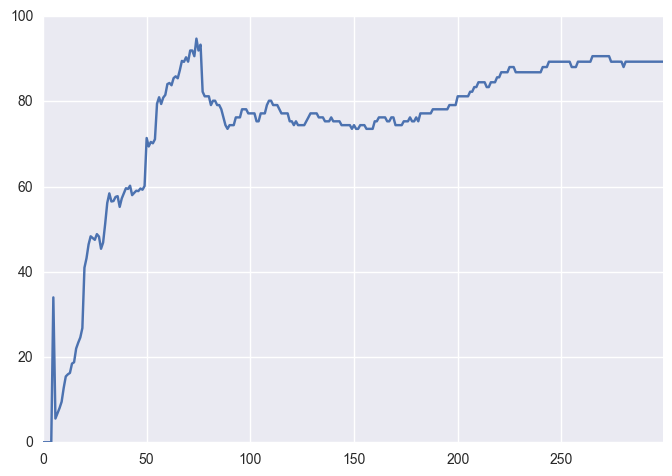

In [156]:
constant_df.eCPC.plot()

In [73]:
new_pd = df_v[df_v.payprice < 95]
new_pd = new_pd[new_pd.payprice.cumsum()<6250]

In [42]:
(df_v[df_v.payprice <= 95].payprice/1000).cumsum() < 6250

C:\Users\Weng\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


IndexingError: Unalignable boolean Series key provided

In [14]:
np.count_nonzero(df[df.payprice <= 5].click)

4

In [15]:
sample[sample.payprice <= 0]

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
1861581,0,6,15,7d673323186e86808b52820ee01b399c,1,u_DABF1DErwvN,mac_safari,60.182.159.*,94,101,...,90,Na,Na,0,12632,294,0,null,2261,"10083,10110"
475442,0,3,17,4aba0ad3ec8c16baf47948ba126eb5bd,1,u_DAOH3O4ev0I,windows_chrome,39.190.239.*,0,0,...,90,Na,Na,0,12632,294,0,null,2261,null
381615,0,6,16,e35f600105ace336465932fcd6879e79,1,u_D3A76ZCCbj9,windows_chrome,70.27.136.*,0,0,...,90,Na,Na,0,12632,294,0,null,2261,"10057,10059,14273,10076,10077,10075,10083,1010..."


In [16]:
#lower boundary = 249 min bid price / upper boundary = any i.e 300-1 = 299
def random_bid(dataframe):
    for i in range(len(dataframe)):
        bid_id = dataframe.iloc[i].bidid;
        bid_price = np.random.randint(low=249,high=302);  
        print('Bid_id: '+ bid_id + ' ,' ,'Bid_price: '+ str(bid_price)) 

In [17]:
sample[sample.payprice <= 274].click.value_counts().sum()

9923

In [18]:
sample.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
474941,0,4,17,002f729aaebc4c518eb4d71cc0b8b84d,1,u_VhCxLx9TDQuvXsE,windows_chrome,119.54.187.*,55,58,...,90,0,0,70,86c2543527c86a893d4d4f68810a0416,300,70,43f4a37f42a7c5e6219e2601b26c6976,3386,"10076,10006,10083,10052,13403,10063,14273,1304..."
483413,0,6,14,80470c95c1e87adf18491d9425587868,1,u_Vhk7P5uCOIm63VL,windows_chrome,211.138.76.*,359,360,...,90,0,0,20,0cd33fcb336655841d3e1441b915748d,254,84,c8758e8658b05bc3a88af7b37bdf0575,3476,10075
2279125,0,4,15,d635c7afd78dae522602dc16316bd348,1,u_Vh5_PkFwL6NLJMa,windows_ie,120.43.136.*,124,129,...,250,1,0,5,44966cc8da1ed40c95d59e863c8c75f0,300,135,361e128affece850342293213691a043,3386,10024
2247826,0,5,15,f120fd83255b58f85d55865eecc7b923,1,u_Vhd_1DTG3Uf9BZj,windows_ie,125.93.171.*,216,233,...,90,2,1,0,cc9b344e950b4f8c2b96537174a343b7,227,152,d29e59bf0f7f8243858b8183f14d4412,3358,"10006,10063,10110"
2342767,0,3,20,d907892ea3b81b39ea62c20eca6a9b26,1,u_Vh1pVRprPlMcJG8,windows_ie,221.205.126.*,15,16,...,250,0,1,0,44966cc8da1ed40c95d59e863c8c75f0,300,101,361e128affece850342293213691a043,3386,"10024,10006,10031,13042,10075,13800,10110"


#### Use contant bid version 2

In [19]:
y1 = constant_bid_v2(sample,0);
y = constant_bid_v2(sample,200)

In [20]:
y

[200, 10, 9229, 92.29, 624.384, 0.108, 67.65, 62.44]

In [21]:
emptiness = []

In [22]:
for i in range(0,10):
    metrics = constant_bid_v2(sample,i)
    emptiness += [metrics]
    

In [23]:
# plot_df.reset_index(drop = True)  ------ use to reset the index

In [24]:
#Roughly 11 mins
def find_opt_bid(data_frame,min_value, max_value):
    emptiness = []   # Empty list to add things in 
    for i in range(min_value,max_value):  # Evaluates the bid value range
        metrics = constant_bid_v2(data_frame,i);   #uses the constant bid function
        emptiness += [metrics]
    plot_df= pd.DataFrame(emptiness)
    plot_df.columns=['Bid_value','Clicks', 'Impressions_won', 'Win_ratio', 'Total_cost', 'CTR', 'CPM', 'eCPC']
    return plot_df

In [26]:
%%time
graph_df_v = find_opt_bid(df_v,0,311)

Wall time: 2min


#### Storing variables + removing them 

In [181]:
%store graph_df

Stored 'graph_df' (DataFrame)


In [179]:
%store -z  #Use this to remove all storage variables 

In [18]:
#to show a list of the stored variables and -r to restor
%store -r 

In [30]:
print(graph_df_v.loc[[84,95,106,274,300]].drop(['Impressions_won','Total_cost'],axis =1 ).to_latex(index = False))

\begin{tabular}{rrrrrr}
\toprule
 Bid\_value &  Clicks &  Win\_ratio &    CTR &    CPM &    eCPC \\
\midrule
        84 &     110 &      68.07 &  0.054 &  45.76 &   84.88 \\
        95 &     123 &      73.51 &  0.056 &  48.98 &   87.75 \\
       106 &     133 &      76.50 &  0.058 &  51.01 &   87.94 \\
       274 &     222 &      99.20 &  0.075 &  78.56 &  105.22 \\
       300 &     226 &     100.00 &  0.075 &  80.22 &  106.39 \\
\bottomrule
\end{tabular}



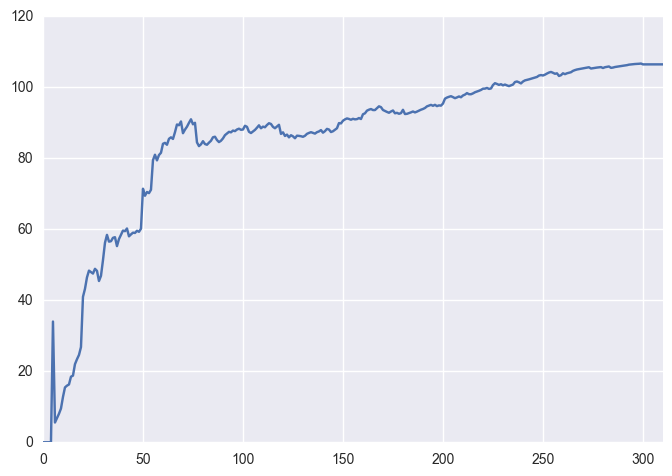

In [46]:
graph_df_v.eCPC.plot()

In [239]:
graph_df.columns

Index(['Bid_value', 'Clicks', 'Impressions_won', 'Win_ratio', 'Total_cost',
       'CTR', 'CPM', 'eCPC'],
      dtype='object')

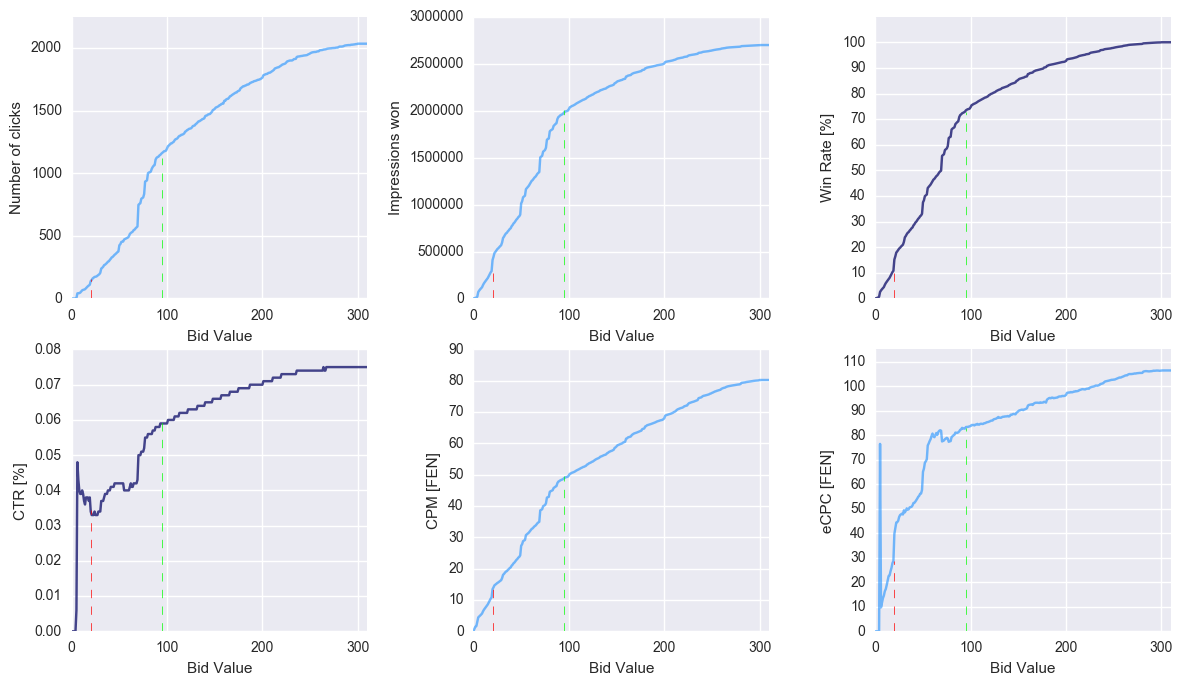

In [465]:
#Plot of constant bid metrics - Remember to change the colours for the plotss afterwards
#plt.figure()
fig, axes = plt.subplots(nrows= 2, ncols = 3, figsize=(12,7) )

#Clicks - 1
ax1= graph_df.Clicks.plot(ax=axes[0,0],color ='dodgerblue', alpha = 0.6)
ax1.set_ylabel('Number of clicks')
ax1.set_xlabel('Bid Value')
ax1.set_xticks(np.arange(0,305,100))
ax1.set_yticks(np.arange(0,2600,500))
ax1.set_ylim(top=2250)
ax1.axvline(x= 20, ymax=0.07, linewidth=0.5, color='red', linestyle = '--')
ax1.axvline(x= 95, ymax=0.5, linewidth=0.5, color='lime', linestyle = '--')

#Impressions won - 2
ax2= graph_df.Impressions_won.plot(ax=axes[0,1],color ='dodgerblue', alpha = 0.6)
ax2.set_ylabel('Impressions won')
ax2.set_xlabel('Bid Value')
ax2.set_xticks(np.arange(0,305,100))
ax2.set_yticks(np.arange(0,3250000,500000))
ax2.set_ylim(top=3000000)
ax2.axvline(x= 20, ymax=0.12, linewidth=0.5, color='red', linestyle = '--')
ax2.axvline(x= 95, ymax=0.67, linewidth=0.5, color='lime', linestyle = '--')

#Win ratio - 3
ax3= graph_df.Win_ratio.plot(ax=axes[0,2],color ='Midnightblue', alpha = 0.8)
ax3.set_ylabel('Win Rate [%]')
ax3.set_xlabel('Bid Value')
ax3.set_xticks(np.arange(0,305,100))
ax3.set_yticks(np.arange(0,110,10))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax3.set_ylim(top=110)
ax3.axvline(x= 20, ymax=0.12, linewidth=0.5, color='red', linestyle = '--')
ax3.axvline(x= 95, ymax=0.66, linewidth=0.5, color='lime', linestyle = '--')

#CTR -  4
ax4= graph_df.CTR.plot(ax=axes[1,0],color ='Midnightblue', alpha = 0.8)
ax4.set_ylabel('CTR [%]')
ax4.set_xlabel('Bid Value')
ax4.set_xticks(np.arange(0,305,100))
ax4.set_yticks(np.arange(0,0.085,0.01))
ax4.axvline(x= 20, ymax=0.43, linewidth=0.5, color='red', linestyle = '--')
ax4.axvline(x= 95, ymax=0.75, linewidth=0.5, color='lime', linestyle = '--')

#CPM - 5
ax5= graph_df.CPM.plot(ax=axes[1,1],color ='dodgerblue', alpha = 0.6)
ax5.set_ylabel('CPM [FEN]')
ax5.set_xlabel('Bid Value')
ax5.set_xticks(np.arange(0,305,100))
ax5.set_yticks(np.arange(0,110,10))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax5.set_ylim(top=90)
ax5.axvline(x= 20, ymax=0.15, linewidth=0.5, color='red', linestyle = '--')
ax5.axvline(x= 95, ymax=0.55, linewidth=0.5, color='lime', linestyle = '--')

#eCPC - 6
ax6= graph_df.eCPC.plot(ax=axes[1,2],color ='dodgerblue', alpha = 0.6)
ax6.set_ylabel('eCPC [FEN]')
ax6.set_xlabel('Bid Value')
ax6.set_xticks(np.arange(0,305,100))
ax6.set_yticks(np.arange(0,120,10))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax6.set_ylim(top=115)
ax6.axvline(x= 20, ymax=0.25, linewidth=0.5, color='red', linestyle = '--')
ax6.axvline(x= 95, ymax=0.72, linewidth=0.5, color='lime', linestyle = '--')

plt.grid(True)
plt.tight_layout(h_pad = 0.1)



#Save image
#plt.savefig('Constant_metrics.jpg',bbox_inches='tight')

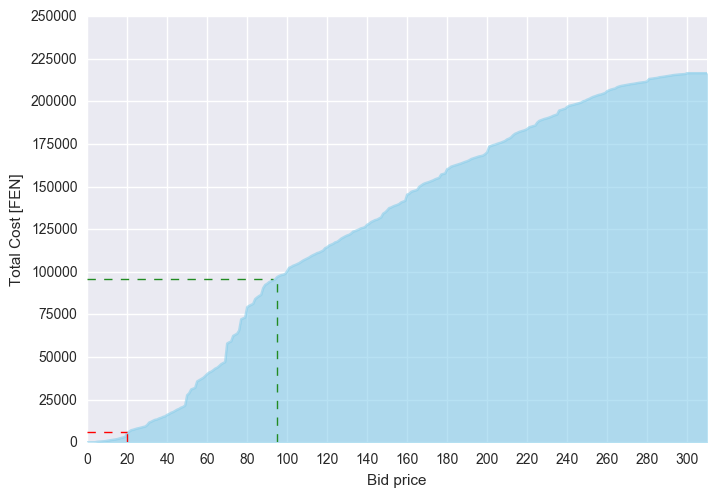

In [67]:
#Bid value and Total cost
plt.figure()
ax7= graph_df.Total_cost.plot(kind='area',alpha=0.6, color='skyblue')
ax7.set_ylabel('Total Cost [FEN]')
ax7.set_xlabel('Bid price')
ax7.set_xticks(np.arange(0,305,20))
ax7.set_yticks(np.arange(0,260000,25000))
plt.grid(True)
ax7.axvline(x= 20, ymax=0.025, linewidth=1, color='red', linestyle='--')
ax7.axhline(y= 6250, xmax=0.065, linewidth=1, color='red', linestyle='--')    #Budget = 6250 FEN
ax7.axvline(x= 95, ymax=0.39, linewidth=1, color='forestgreen', linestyle='--')
ax7.axhline(y= 96000, xmax=0.30, linewidth=1, color='forestgreen', linestyle='--')   #Budget = 96000 FEN

#Save image
#plt.savefig('Bid_vs_cost.jpg',bbox_inches='tight')

#### Validation set evaluation

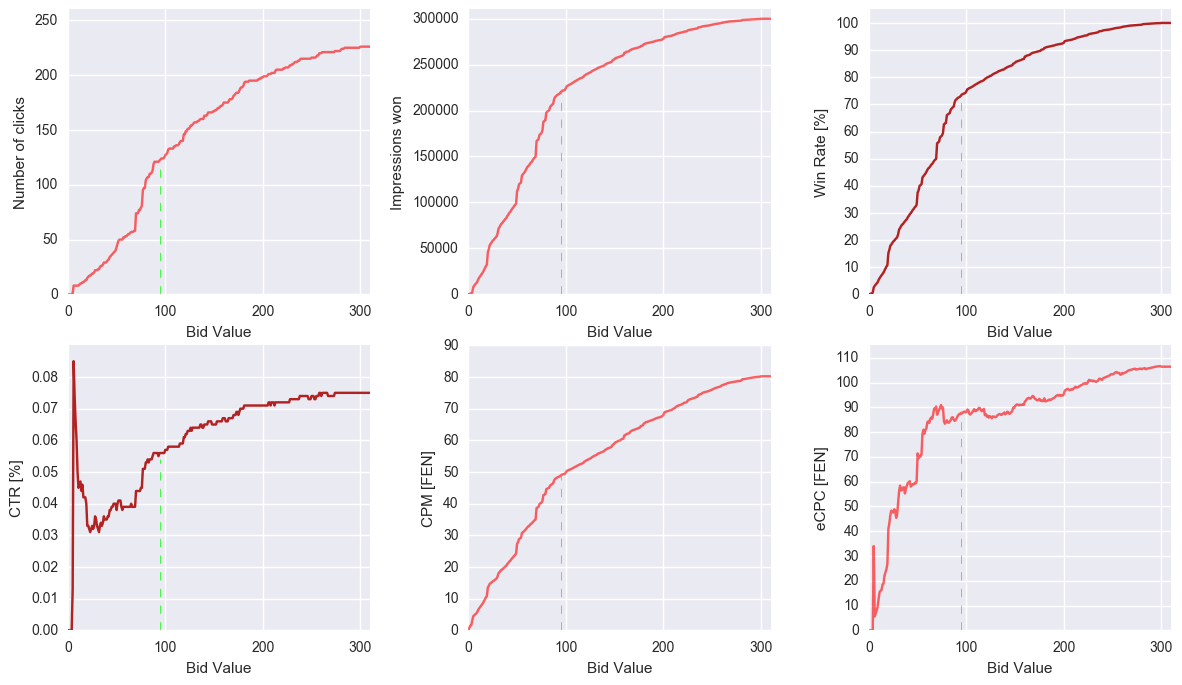

In [69]:
#Plot of constant bid metrics - VALIDATION SET
#plt.figure()
fig2, axes = plt.subplots(nrows= 2, ncols = 3, figsize=(12,7) )

#Clicks - 1
ax1= graph_df_v.Clicks.plot(ax=axes[0,0],color ='red', alpha = 0.6)
ax1.set_ylabel('Number of clicks')
ax1.set_xlabel('Bid Value')
ax1.set_xticks(np.arange(0,305,100))
ax1.set_yticks(np.arange(0,260,50))
ax1.set_ylim(top=260)
ax1.axvline(x= 95, ymax=0.45, linewidth=0.5, color='lime', linestyle = '--')

#Impressions won - 2
ax2= graph_df_v.Impressions_won.plot(ax=axes[0,1],color ='red', alpha = 0.6)
ax2.set_ylabel('Impressions won')
ax2.set_xlabel('Bid Value')
ax2.set_xticks(np.arange(0,305,100))
ax2.set_yticks(np.arange(0,310000,50000))
ax2.set_ylim(top=310000)
ax2.axvline(x= 95, ymax=0.72, linewidth=0.5, color='lime', linestyle = '--')

#Win ratio - 3
ax3= graph_df_v.Win_ratio.plot(ax=axes[0,2],color ='firebrick', alpha = 1)
ax3.set_ylabel('Win Rate [%]')
ax3.set_xlabel('Bid Value')
ax3.set_xticks(np.arange(0,305,100))
ax3.set_yticks(np.arange(0,110,10))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax3.set_ylim(top=105)
ax3.axvline(x= 95, ymax=0.7, linewidth=0.5, color='lime', linestyle = '--')

#CTR -  4
ax4= graph_df_v.CTR.plot(ax=axes[1,0],color ='firebrick', alpha = 1)
ax4.set_ylabel('CTR [%]')
ax4.set_xlabel('Bid Value')
ax4.set_xticks(np.arange(0,305,100))
ax4.set_yticks(np.arange(0,0.085,0.01))

ax4.axvline(x= 95, ymax=0.60, linewidth=0.5, color='lime', linestyle = '--')

#CPM - 5
ax5= graph_df_v.CPM.plot(ax=axes[1,1],color ='red', alpha = 0.6)
ax5.set_ylabel('CPM [FEN]')
ax5.set_xlabel('Bid Value')
ax5.set_xticks(np.arange(0,305,100))
ax5.set_yticks(np.arange(0,110,10))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax5.set_ylim(top=90)
ax5.axvline(x= 95, ymax=0.55, linewidth=0.5, color='lime', linestyle = '--')

#eCPC - 6
ax6= graph_df_v.eCPC.plot(ax=axes[1,2],color ='red', alpha = 0.6)
ax6.set_ylabel('eCPC [FEN]')
ax6.set_xlabel('Bid Value')
ax6.set_xticks(np.arange(0,305,100))
ax6.set_yticks(np.arange(0,120,10))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax6.set_ylim(top=115)
ax6.axvline(x= 95, ymax=0.77, linewidth=0.5, color='lime', linestyle = '--')

plt.grid(True)
plt.tight_layout(h_pad = 0.1)

#Save image
#plt.savefig('Constant_metrics_validation.jpg',bbox_inches='tight')

In [157]:
constant_df.head()

,bid_price,clicks,impressions,win_ratio,total_cost,CTR,CPM,eCPC
0,1,0,71,0.02,0.000,0.0,0.00,0.0
1,2,0,360,0.12,0.289,0.0,0.80,0.0
2,3,0,798,0.27,1.165,0.0,1.46,0.0
3,4,0,882,0.29,1.417,0.0,1.61,0.0
4,5,0,2133,0.71,6.421,0.0,3.01,0.0


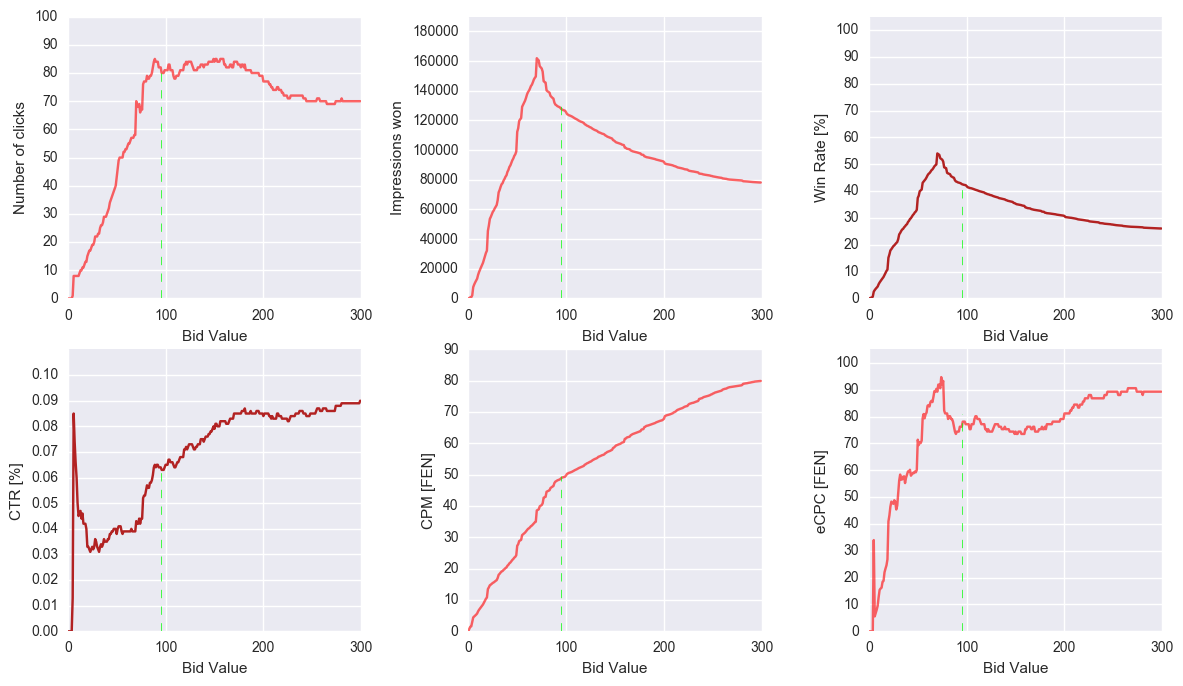

In [195]:
# VALIDATION SET - Budget of 6250
#plt.figure()
fig3, axes = plt.subplots(nrows= 2, ncols = 3, figsize=(12,7) )

#Clicks - 1
ax1= constant_df.Clicks.plot(ax=axes[0,0],color ='red', alpha = 0.6)
ax1.set_ylabel('Number of clicks')
ax1.set_xlabel('Bid Value')
ax1.set_xticks(np.arange(0,305,100))
ax1.set_yticks(np.arange(0,110,10))
ax1.set_ylim(top=100)
ax1.axvline(x= 95, ymax=0.80, linewidth=0.5, color='lime', linestyle = '--')

#Impressions won - 2
ax2= constant_df.Impressions_won.plot(ax=axes[0,1],color ='red', alpha = 0.6)
ax2.set_ylabel('Impressions won')
ax2.set_xlabel('Bid Value')
ax2.set_xticks(np.arange(0,305,100))
ax2.set_yticks(np.arange(0,220000,20000))
ax2.set_ylim(top=190000)
ax2.axvline(x= 95, ymax=0.70, linewidth=0.5, color='lime', linestyle = '--')

#Win ratio - 3
ax3= constant_df.Win_ratio.plot(ax=axes[0,2],color ='firebrick', alpha = 1)
ax3.set_ylabel('Win Rate [%]')
ax3.set_xlabel('Bid Value')
ax3.set_xticks(np.arange(0,305,100))
ax3.set_yticks(np.arange(0,110,10))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax3.set_ylim(top=105)
ax3.axvline(x= 95, ymax=0.40, linewidth=0.5, color='lime', linestyle = '--')

#CTR -  4
ax4= constant_df.CTR.plot(ax=axes[1,0],color ='firebrick', alpha = 1)
ax4.set_ylabel('CTR [%]')
ax4.set_xlabel('Bid Value')
ax4.set_xticks(np.arange(0,305,100))
ax4.set_yticks(np.arange(0,0.110,0.01))
ax4.set_ylim(top=0.11)
ax4.axvline(x= 95, ymax=0.57, linewidth=0.5, color='lime', linestyle = '--')

#CPM - 5
ax5= constant_df.CPM.plot(ax=axes[1,1],color ='red', alpha = 0.6)
ax5.set_ylabel('CPM [FEN]')
ax5.set_xlabel('Bid Value')
ax5.set_xticks(np.arange(0,305,100))
ax5.set_yticks(np.arange(0,110,10))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax5.set_ylim(top=90)
ax5.axvline(x= 95, ymax=0.55, linewidth=0.5, color='lime', linestyle = '--')

#eCPC - 6
ax6= constant_df.eCPC.plot(ax=axes[1,2],color ='red', alpha = 0.6)
ax6.set_ylabel('eCPC [FEN]')
ax6.set_xlabel('Bid Value')
ax6.set_xticks(np.arange(0,305,100))
ax6.set_yticks(np.arange(0,120,10))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax6.set_ylim(top=105)
ax6.axvline(x= 95, ymax=0.77, linewidth=0.5, color='lime', linestyle = '--')

plt.grid(True)
plt.tight_layout(h_pad = 0.1)

#Save image
#plt.savefig('Constant_bid_valid.jpg',bbox_inches='tight')

In [202]:
constant_df.tail(n=40)

,Bid_value,Clicks,Impressions_won,Win_ratio,Total_cost,CTR,CPM,eCPC
260,261,70,80974,27.01,6249.932,0.086,77.18,89.28
261,262,70,80862,26.98,6249.922,0.087,77.29,89.28
262,263,70,80739,26.94,6249.944,0.087,77.41,89.28
263,264,70,80682,26.92,6249.974,0.087,77.46,89.29
264,265,70,80613,26.89,6249.881,0.087,77.53,89.28
265,266,69,80398,26.82,6249.989,0.086,77.74,90.58
266,267,69,80279,26.78,6249.987,0.086,77.85,90.58
267,268,69,80179,26.75,6249.995,0.086,77.95,90.58
268,269,69,80131,26.73,6249.917,0.086,78.00,90.58
269,270,69,80092,26.72,6249.952,0.086,78.03,90.58


In [208]:
print(constant_df.loc[[83,94,105,273,299]].drop(['Impressions_won','Total_cost'],axis =1 ).to_latex(index = False))

\begin{tabular}{rrrrrr}
\toprule
 Bid\_value &  Clicks &  Win\_ratio &    CTR &    CPM &   eCPC \\
\midrule
        84 &      78 &      46.30 &  0.056 &  45.03 &  80.13 \\
        95 &      82 &      42.90 &  0.064 &  48.60 &  76.22 \\
       106 &      81 &      41.03 &  0.066 &  50.82 &  77.16 \\
       274 &      69 &      26.64 &  0.086 &  78.26 &  90.58 \\
       300 &      70 &      26.08 &  0.090 &  79.94 &  89.29 \\
\bottomrule
\end{tabular}



#### CHECKPOINT

In [ ]:
#random_bid(sample)

In [ ]:
#Evaluation tool

In [ ]:
out = random_bid(sample)

In [ ]:
example = sample[sample.bidprice <= 274].click.value_counts().sort_index().tolist()
win= sum(sample[sample.bidprice <= 274].click.value_counts())
win_ratio = round((win/sample.shape[0])*100,2)
#CTR = e

In [ ]:
sample.click.value_counts()

In [ ]:
sample[sample.bidprice <= 274].click.value_counts().tolist()

In [ ]:
sum(sample[sample.bidprice <= 274].click.value_counts())

In [ ]:
(example[1]/example[0])*100 #CTR of the won impressions

In [ ]:
example

In [ ]:
win

In [ ]:
sample.shape[0]

In [ ]:
win_ratio

In [ ]:
range(len(sample))

In [ ]:
sample.iloc[2].bidid

In [ ]:
df.bidprice.mean()

In [ ]:
df.sample(n=5)

In [ ]:
np.random.randint(low=5,high=11)   